<a href="https://colab.research.google.com/github/dnasywa/projectsPortfolio/blob/main/Student%20Timetabling/Capstone%20Project%20-%20Prescriptive%20Modelling%20%26%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ES234940 - Prescripctive Modeling And Analytics**

**Guided Capstone Project**

**Group #6**


1.   5026201017 - AWLIYA HANUN IZDIHAR
2.   5026201033 - SHOLIKAH DESI PURWANTI
3.   5026201039 - BELVA RIZKI MUFIDAH
4.   5026201074 - DARA NASYWA FATHYA AFIQAH A




# **Understanding the Problem**

In this case study, we are dealing with the challenge of optimally assigning students into cohorts for a certain program. We have **3 datasets** at our disposal:

1. A list detailing the availability of students.
2. A list outlining the availability of teaching assistants (TAs).
3. A list showing the availability of rooms.

The objective is to **form 6 cohorts** in such a way that the number of students who do not get assigned to any cohort is **minimized**. This is a complex task as it involves considering multiple factors such as the schedules of students and TAs, as well as the availability of rooms. The goal is to come up with an assignment that accommodates as many students as possible, while also adhering to the constraints related to TAs and rooms. This requires careful planning and possibly the use of optimization techniques to ensure the most efficient use of resources.

# **Develop the Math Model**

####**Variables Note**
1. Timeslot: t
2. Room: r
3. Cohort: c
4. Teaching assistant: a
5. Student: s

#### **Decision Variables**


* Timeslot and room for each cohort (c1 - c6)
  
  ti (i = 1-20) e {1, 2, . . ., 20}
  
  ri (i= 1-6) e {1, 2, . . ., 6}

* Assign teaching assistant to cohort

  ai (i = 1-12) e {1, 2, . . ., 12}

* Assign each student to cohort

  si (i = 1-229) e {1, 2, . . ., 229}



## **Objective Function**

Minimize number of student can't be assigned to attendable cohort

## **Hard Constraints**

1. Number of student can't exceed the room capacity
2. Each student must be assigned to at most 1 cohort
3. Each student can be assigned to attendable cohort (the student is available within the cohort timeslot) only
4. Each teaching assistant must be assigned to exactly 1 cohort
5. Each teaching assistant can be assigned to attandable cohort only
6. Each cohort must be assigned to available room within the given timeslot
7. Each cohort must be assigned with exactly 2 teaching assistant
8. No 2 cohort or more are assigned to the same room in the same timeslot



# **Develop the Model**

In [ ]:
import random
import math
import matplotlib.pyplot as plt

## **Load Data Student**

In [ ]:
import pandas as pd

In [ ]:
data_student = f'https://docs.google.com/spreadsheets/d/1yo-G9-aeIzc6kXJ4SXR2qHtgU8qHTuxP/gviz/tq?tqx=out:csv&sheet=student_list'
student = pd.read_csv(data_student, header = None)

In [ ]:
student

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-,NaN,NaN,NaN,Senin,NaN,NaN,NaN,Selasa,NaN,...,Kamis,NaN,NaN,NaN,Jumat,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Jam Ke:,1,2.0,3.0,4.0,5,6.0,...,13,14.0,15.0,16.0,17,18.0,19.0,20.0,NaN,NaN
2,NaN,NaN,Full Name,Class,1,2.0,3.0,4.0,5,6.0,...,13,14.0,15.0,16.0,17,18.0,19.0,20.0,NaN,Lab Session #5
3,1,5.026221e+09,Viqi Alvianto,A,0,0.0,0.0,1.0,1,0.0,...,1,1.0,0.0,1.0,0,1.0,1.0,1.0,10.0,A
4,2,5.026221e+09,Shabrina Nur Ihsani,A,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,1.0,0,0.0,1.0,1.0,6.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,NaN,0.000000e+00,Not available for Lab Session,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,NaN,NaN,07.30-10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,NaN,NaN,10.15-12.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,NaN,13.00-15.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop unused header
student = student.drop([0, 1, 2])

# drop unused footnote
student = student.iloc[:-7]

# drop unused columns
student = student.drop(student.columns[[24, 25]],axis = 1)

# data preview
student

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
3,1,5.026221e+09,Viqi Alvianto,A,0,0.0,0.0,1.0,1,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,1.0,1.0,1.0
4,2,5.026221e+09,Shabrina Nur Ihsani,A,0,0.0,0.0,0.0,0,0.0,...,1.0,1.0,0,0.0,0.0,1.0,0,0.0,1.0,1.0
5,3,5.026221e+09,Belva Talitha Dwiyanti,A,0,0.0,0.0,1.0,0,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
6,4,5.026221e+09,Celine Auriel,A,0,0.0,1.0,1.0,0,0.0,...,1.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0
7,5,5.026221e+09,Jason Ho,A,0,0.0,1.0,1.0,0,0.0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,225,5.026221e+09,Rafly Nur Mahmudi,IUP,0,1.0,1.0,0.0,0,0.0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
228,226,5.026221e+09,Thariq Abyan Arrayyan,IUP,0,1.0,1.0,0.0,0,0.0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
229,227,5.026221e+09,Aqilah Sajidah Pramono,IUP,0,1.0,1.0,0.0,0,0.0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
230,228,5.026221e+09,Andiar Rinanda Agastya,IUP,0,1.0,1.0,0.0,0,0.0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0


In [ ]:
# assign the header
student.columns = ['Student No', 'Student ID', 'Student Name', 'Class', 'TSS 1', 'TSS 2', 'TSS 3', 'TSS 4', 'TSS 5',
                   'TSS 6', 'TSS 7', 'TSS 8', 'TSS 9', 'TSS 10', 'TSS 11', 'TSS 12', 'TSS 13', 'TSS 14',
                   'TSS 15', 'TSS 16', 'TSS 17', 'TSS 18', 'TSS 19', 'TSS 20']

# data preview
student

,Student No,Student ID,Student Name,Class,TSS 1,TSS 2,TSS 3,TSS 4,TSS 5,TSS 6,...,TSS 11,TSS 12,TSS 13,TSS 14,TSS 15,TSS 16,TSS 17,TSS 18,TSS 19,TSS 20
3,1,5.026221e+09,Viqi Alvianto,A,0,0.0,0.0,1.0,1,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,1.0,1.0,1.0
4,2,5.026221e+09,Shabrina Nur Ihsani,A,0,0.0,0.0,0.0,0,0.0,...,1.0,1.0,0,0.0,0.0,1.0,0,0.0,1.0,1.0
5,3,5.026221e+09,Belva Talitha Dwiyanti,A,0,0.0,0.0,1.0,0,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
6,4,5.026221e+09,Celine Auriel,A,0,0.0,1.0,1.0,0,0.0,...,1.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0
7,5,5.026221e+09,Jason Ho,A,0,0.0,1.0,1.0,0,0.0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,225,5.026221e+09,Rafly Nur Mahmudi,IUP,0,1.0,1.0,0.0,0,0.0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
228,226,5.026221e+09,Thariq Abyan Arrayyan,IUP,0,1.0,1.0,0.0,0,0.0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
229,227,5.026221e+09,Aqilah Sajidah Pramono,IUP,0,1.0,1.0,0.0,0,0.0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
230,228,5.026221e+09,Andiar Rinanda Agastya,IUP,0,1.0,1.0,0.0,0,0.0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0


In [ ]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 3 to 231
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student No    229 non-null    object 
 1   Student ID    224 non-null    float64
 2   Student Name  229 non-null    object 
 3   Class         229 non-null    object 
 4   TSS 1         229 non-null    object 
 5   TSS 2         229 non-null    float64
 6   TSS 3         229 non-null    float64
 7   TSS 4         229 non-null    float64
 8   TSS 5         229 non-null    object 
 9   TSS 6         229 non-null    float64
 10  TSS 7         229 non-null    float64
 11  TSS 8         229 non-null    float64
 12  TSS 9         229 non-null    object 
 13  TSS 10        229 non-null    float64
 14  TSS 11        229 non-null    float64
 15  TSS 12        229 non-null    float64
 16  TSS 13        229 non-null    object 
 17  TSS 14        229 non-null    float64
 18  TSS 15        229 non-null    

In [ ]:
# convert data type for each column
columns = ['TSS ' + str(i) for i in range(1, 21)]  # Generate a list: ['TS 1', 'TS 2', ..., 'TS 20']

for col in columns:
    student[col] = student[col].apply(pd.to_numeric)

student['Student No'] = student["Student No"].astype(int)
student["Student ID"] = student["Student ID"].astype(str).str.replace('.0', '', regex=False)

In [ ]:
fix_student = student
fix_student

,Student No,Student ID,Student Name,Class,TSS 1,TSS 2,TSS 3,TSS 4,TSS 5,TSS 6,...,TSS 11,TSS 12,TSS 13,TSS 14,TSS 15,TSS 16,TSS 17,TSS 18,TSS 19,TSS 20
3,1,5026221001,Viqi Alvianto,A,0,0.0,0.0,1.0,1,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,1.0,1.0,1.0
4,2,5026221002,Shabrina Nur Ihsani,A,0,0.0,0.0,0.0,0,0.0,...,1.0,1.0,0,0.0,0.0,1.0,0,0.0,1.0,1.0
5,3,5026221003,Belva Talitha Dwiyanti,A,0,0.0,0.0,1.0,0,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
6,4,5026221004,Celine Auriel,A,0,0.0,1.0,1.0,0,0.0,...,1.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0
7,5,5026221005,Jason Ho,A,0,0.0,1.0,1.0,0,0.0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,225,5026221216,Rafly Nur Mahmudi,IUP,0,1.0,1.0,0.0,0,0.0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
228,226,5026221217,Thariq Abyan Arrayyan,IUP,0,1.0,1.0,0.0,0,0.0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
229,227,5026221218,Aqilah Sajidah Pramono,IUP,0,1.0,1.0,0.0,0,0.0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
230,228,5026221219,Andiar Rinanda Agastya,IUP,0,1.0,1.0,0.0,0,0.0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0


In [ ]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 3 to 231
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student No    229 non-null    int64  
 1   Student ID    229 non-null    object 
 2   Student Name  229 non-null    object 
 3   Class         229 non-null    object 
 4   TSS 1         229 non-null    int64  
 5   TSS 2         229 non-null    float64
 6   TSS 3         229 non-null    float64
 7   TSS 4         229 non-null    float64
 8   TSS 5         229 non-null    int64  
 9   TSS 6         229 non-null    float64
 10  TSS 7         229 non-null    float64
 11  TSS 8         229 non-null    float64
 12  TSS 9         229 non-null    int64  
 13  TSS 10        229 non-null    float64
 14  TSS 11        229 non-null    float64
 15  TSS 12        229 non-null    float64
 16  TSS 13        229 non-null    int64  
 17  TSS 14        229 non-null    float64
 18  TSS 15        229 non-null    

In [ ]:
tes_stu = student.drop(student.columns[[1, 2, 3]],axis = 1)
tes_stu

,Student No,TSS 1,TSS 2,TSS 3,TSS 4,TSS 5,TSS 6,TSS 7,TSS 8,TSS 9,...,TSS 11,TSS 12,TSS 13,TSS 14,TSS 15,TSS 16,TSS 17,TSS 18,TSS 19,TSS 20
3,1,0,0.0,0.0,1.0,1,0.0,0.0,0.0,0,...,1.0,1.0,1,1.0,0.0,1.0,0,1.0,1.0,1.0
4,2,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,...,1.0,1.0,0,0.0,0.0,1.0,0,0.0,1.0,1.0
5,3,0,0.0,0.0,1.0,0,0.0,0.0,0.0,1,...,1.0,1.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
6,4,0,0.0,1.0,1.0,0,0.0,0.0,0.0,1,...,1.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0
7,5,0,0.0,1.0,1.0,0,0.0,0.0,0.0,0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,225,0,1.0,1.0,0.0,0,0.0,1.0,1.0,0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
228,226,0,1.0,1.0,0.0,0,0.0,1.0,1.0,0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
229,227,0,1.0,1.0,0.0,0,0.0,1.0,1.0,0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
230,228,0,1.0,1.0,0.0,0,0.0,1.0,1.0,0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0


In [ ]:
# assign the header
tes_stu.columns = ['stuid', '1', '2', '3', '4', '5',
                '6', '7', '8', '9', '10', '11', '12', '13', '14',
                '15', '16', '17', '18', '19', '20']

# data preview
tes_stu

,stuid,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
3,1,0,0.0,0.0,1.0,1,0.0,0.0,0.0,0,...,1.0,1.0,1,1.0,0.0,1.0,0,1.0,1.0,1.0
4,2,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,...,1.0,1.0,0,0.0,0.0,1.0,0,0.0,1.0,1.0
5,3,0,0.0,0.0,1.0,0,0.0,0.0,0.0,1,...,1.0,1.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
6,4,0,0.0,1.0,1.0,0,0.0,0.0,0.0,1,...,1.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0
7,5,0,0.0,1.0,1.0,0,0.0,0.0,0.0,0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,225,0,1.0,1.0,0.0,0,0.0,1.0,1.0,0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
228,226,0,1.0,1.0,0.0,0,0.0,1.0,1.0,0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
229,227,0,1.0,1.0,0.0,0,0.0,1.0,1.0,0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0
230,228,0,1.0,1.0,0.0,0,0.0,1.0,1.0,0,...,1.0,0.0,0,1.0,0.0,0.0,1,1.0,0.0,0.0


In [ ]:
tes_stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 3 to 231
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stuid   229 non-null    int64  
 1   1       229 non-null    int64  
 2   2       229 non-null    float64
 3   3       229 non-null    float64
 4   4       229 non-null    float64
 5   5       229 non-null    int64  
 6   6       229 non-null    float64
 7   7       229 non-null    float64
 8   8       229 non-null    float64
 9   9       229 non-null    int64  
 10  10      229 non-null    float64
 11  11      229 non-null    float64
 12  12      229 non-null    float64
 13  13      229 non-null    int64  
 14  14      229 non-null    float64
 15  15      229 non-null    float64
 16  16      229 non-null    float64
 17  17      229 non-null    int64  
 18  18      229 non-null    float64
 19  19      228 non-null    float64
 20  20      229 non-null    float64
dtypes: float64(15), int64(6)
memory usage: 

In [ ]:
convert_stu = {
    '1': float,
    '5': float,
    '9': float,
    '13': float,
    '17': float
}
tes_stu = tes_stu.astype(convert_stu)
tes_stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 3 to 231
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stuid   229 non-null    int64  
 1   1       229 non-null    float64
 2   2       229 non-null    float64
 3   3       229 non-null    float64
 4   4       229 non-null    float64
 5   5       229 non-null    float64
 6   6       229 non-null    float64
 7   7       229 non-null    float64
 8   8       229 non-null    float64
 9   9       229 non-null    float64
 10  10      229 non-null    float64
 11  11      229 non-null    float64
 12  12      229 non-null    float64
 13  13      229 non-null    float64
 14  14      229 non-null    float64
 15  15      229 non-null    float64
 16  16      229 non-null    float64
 17  17      229 non-null    float64
 18  18      229 non-null    float64
 19  19      228 non-null    float64
 20  20      229 non-null    float64
dtypes: float64(20), int64(1)
memory usage: 

In [ ]:
tes_stu.reset_index(drop=True, inplace=True)
tes_stu

,stuid,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,225,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
225,226,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
226,227,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
227,228,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
tes_stu = tes_stu.drop(tes_stu.columns[[0]],axis = 1)
tes_stu

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
225,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
226,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
227,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


## **Load Data Teaching Assistant**

In [ ]:
data_ta = f'https://docs.google.com/spreadsheets/d/1bV0QkqoL1k7QUh3wQTpekC45otwX79o7/gviz/tq?tqx=out:csv'
ta = pd.read_csv(data_ta, header = None)
ta

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,,NaN,NaN,NaN,Hari,Senin,NaN,NaN,NaN,Selasa,...,Kamis,NaN,NaN,NaN,Jumat,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Jam Ke:,1,2.0,3.0,4.0,5,...,13,14.0,15.0,16.0,17,18.0,19.0,20.0,NaN,NaN
2,NaN,NaN,Full Name,codeboard,Init,1,2.0,3.0,4.0,5,...,13,14.0,15.0,16.0,17,18.0,19.0,20.0,NaN,NaN
3,1,NaN,Muhammad Fajrul Alam Ulin Nuha,fajrulalam,FA,1,0.0,0.0,0.0,1,...,1,1.0,1.0,1.0,1,1.0,1.0,1.0,14.0,NaN
4,2,5.026201e+09,Muhammad Arif Nuriman,muhammadarif011,AN,0,0.0,0.0,1.0,0,...,1,1.0,0.0,0.0,1,1.0,1.0,1.0,13.0,NaN
5,3,5.026201e+09,Naufal Rafiawan Basara,naufalbasara,RB,0,0.0,1.0,1.0,1,...,1,0.0,0.0,0.0,1,1.0,1.0,1.0,10.0,NaN
6,4,5.026201e+09,Aulia Cisatra,cisatra,AC,0,1.0,1.0,1.0,0,...,0,1.0,0.0,1.0,1,0.0,1.0,1.0,11.0,NaN
7,5,5.026201e+09,Liefran Satrio Sim,lsatriosim,LS,0,0.0,0.0,0.0,0,...,0,1.0,1.0,1.0,0,1.0,1.0,1.0,10.0,NaN
8,6,5.026201e+09,Muhammad Dimas Adijanto,donmai,DA,0,1.0,0.0,0.0,0,...,1,1.0,0.0,0.0,0,1.0,1.0,1.0,8.0,NaN
9,7,5.026211e+09,Inggrit Rismauli Siahaan,inggritsiahaan,IR,1,1.0,0.0,1.0,1,...,1,0.0,0.0,1.0,0,0.0,0.0,1.0,9.0,NaN


In [ ]:
# drop unused header
ta = ta.drop([0, 1, 2])

# drop unused footnote
ta = ta.iloc[:-7]

# drop unused columns
ta = ta.drop(ta.columns[[3, 4, 25, 26]],axis = 1)

# data preview
ta

,0,1,2,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,24
3,1,NaN,Muhammad Fajrul Alam Ulin Nuha,1,0.0,0.0,0.0,1,1.0,1.0,...,1.0,1.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
4,2,5.026201e+09,Muhammad Arif Nuriman,0,0.0,0.0,1.0,0,0.0,1.0,...,1.0,1.0,1,1.0,0.0,0.0,1,1.0,1.0,1.0
5,3,5.026201e+09,Naufal Rafiawan Basara,0,0.0,1.0,1.0,1,0.0,0.0,...,0.0,0.0,1,0.0,0.0,0.0,1,1.0,1.0,1.0
6,4,5.026201e+09,Aulia Cisatra,0,1.0,1.0,1.0,0,0.0,1.0,...,0.0,1.0,0,1.0,0.0,1.0,1,0.0,1.0,1.0
7,5,5.026201e+09,Liefran Satrio Sim,0,0.0,0.0,0.0,0,1.0,1.0,...,0.0,0.0,0,1.0,1.0,1.0,0,1.0,1.0,1.0
8,6,5.026201e+09,Muhammad Dimas Adijanto,0,1.0,0.0,0.0,0,0.0,1.0,...,0.0,0.0,1,1.0,0.0,0.0,0,1.0,1.0,1.0
9,7,5.026211e+09,Inggrit Rismauli Siahaan,1,1.0,0.0,1.0,1,0.0,0.0,...,0.0,1.0,1,0.0,0.0,1.0,0,0.0,0.0,1.0
10,8,5.026211e+09,Ahmadhian Daffa Yudistira,0,0.0,1.0,0.0,0,0.0,0.0,...,0.0,1.0,0,0.0,0.0,1.0,1,0.0,1.0,0.0
11,9,5.026211e+09,Ribka Devina Margaretha,1,0.0,0.0,0.0,1,0.0,0.0,...,0.0,1.0,1,0.0,0.0,1.0,1,1.0,1.0,1.0
12,10,5.026211e+09,Tasya Putri Aliya,0,1.0,1.0,1.0,0,0.0,0.0,...,0.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0


In [ ]:
# assign the header
ta.columns = ['TA No', 'TA ID', 'TA Name', 'TSTA 1', 'TSTA 2', 'TSTA 3', 'TSTA 4', 'TSTA 5',
              'TSTA 6', 'TSTA 7', 'TSTA 8', 'TSTA 9', 'TSTA 10', 'TSTA 11', 'TSTA 12', 'TSTA 13', 'TSTA 14',
              'TSTA 15', 'TSTA 16', 'TSTA 17', 'TSTA 18', 'TSTA 19', 'TSTA 20']

# data preview
ta

,TA No,TA ID,TA Name,TSTA 1,TSTA 2,TSTA 3,TSTA 4,TSTA 5,TSTA 6,TSTA 7,...,TSTA 11,TSTA 12,TSTA 13,TSTA 14,TSTA 15,TSTA 16,TSTA 17,TSTA 18,TSTA 19,TSTA 20
3,1,NaN,Muhammad Fajrul Alam Ulin Nuha,1,0.0,0.0,0.0,1,1.0,1.0,...,1.0,1.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
4,2,5.026201e+09,Muhammad Arif Nuriman,0,0.0,0.0,1.0,0,0.0,1.0,...,1.0,1.0,1,1.0,0.0,0.0,1,1.0,1.0,1.0
5,3,5.026201e+09,Naufal Rafiawan Basara,0,0.0,1.0,1.0,1,0.0,0.0,...,0.0,0.0,1,0.0,0.0,0.0,1,1.0,1.0,1.0
6,4,5.026201e+09,Aulia Cisatra,0,1.0,1.0,1.0,0,0.0,1.0,...,0.0,1.0,0,1.0,0.0,1.0,1,0.0,1.0,1.0
7,5,5.026201e+09,Liefran Satrio Sim,0,0.0,0.0,0.0,0,1.0,1.0,...,0.0,0.0,0,1.0,1.0,1.0,0,1.0,1.0,1.0
8,6,5.026201e+09,Muhammad Dimas Adijanto,0,1.0,0.0,0.0,0,0.0,1.0,...,0.0,0.0,1,1.0,0.0,0.0,0,1.0,1.0,1.0
9,7,5.026211e+09,Inggrit Rismauli Siahaan,1,1.0,0.0,1.0,1,0.0,0.0,...,0.0,1.0,1,0.0,0.0,1.0,0,0.0,0.0,1.0
10,8,5.026211e+09,Ahmadhian Daffa Yudistira,0,0.0,1.0,0.0,0,0.0,0.0,...,0.0,1.0,0,0.0,0.0,1.0,1,0.0,1.0,0.0
11,9,5.026211e+09,Ribka Devina Margaretha,1,0.0,0.0,0.0,1,0.0,0.0,...,0.0,1.0,1,0.0,0.0,1.0,1,1.0,1.0,1.0
12,10,5.026211e+09,Tasya Putri Aliya,0,1.0,1.0,1.0,0,0.0,0.0,...,0.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0


In [ ]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 3 to 14
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TA No    12 non-null     object 
 1   TA ID    11 non-null     float64
 2   TA Name  12 non-null     object 
 3   TSTA 1   12 non-null     object 
 4   TSTA 2   12 non-null     float64
 5   TSTA 3   12 non-null     float64
 6   TSTA 4   12 non-null     float64
 7   TSTA 5   12 non-null     object 
 8   TSTA 6   12 non-null     float64
 9   TSTA 7   12 non-null     float64
 10  TSTA 8   12 non-null     float64
 11  TSTA 9   12 non-null     object 
 12  TSTA 10  12 non-null     float64
 13  TSTA 11  12 non-null     float64
 14  TSTA 12  12 non-null     float64
 15  TSTA 13  12 non-null     object 
 16  TSTA 14  12 non-null     float64
 17  TSTA 15  12 non-null     float64
 18  TSTA 16  12 non-null     float64
 19  TSTA 17  12 non-null     object 
 20  TSTA 18  12 non-null     float64
 21  TSTA 19  12 non-nu

In [ ]:
# convert data type for each column
columns = ['TSTA ' + str(i) for i in range(1, 21)]  # Generate a list: ['TS 1', 'TS 2', ..., 'TS 20']

for col in columns:
    ta[col] = ta[col].apply(pd.to_numeric)

ta['TA No'] = ta['TA No'].astype(int)
ta["TA ID"] = ta["TA ID"].astype(str).str.replace('.0', '', regex=False)

In [ ]:
fix_ta = ta
fix_ta

,TA No,TA ID,TA Name,TSTA 1,TSTA 2,TSTA 3,TSTA 4,TSTA 5,TSTA 6,TSTA 7,...,TSTA 11,TSTA 12,TSTA 13,TSTA 14,TSTA 15,TSTA 16,TSTA 17,TSTA 18,TSTA 19,TSTA 20
3,1,nan,Muhammad Fajrul Alam Ulin Nuha,1,0.0,0.0,0.0,1,1.0,1.0,...,1.0,1.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
4,2,5026201011,Muhammad Arif Nuriman,0,0.0,0.0,1.0,0,0.0,1.0,...,1.0,1.0,1,1.0,0.0,0.0,1,1.0,1.0,1.0
5,3,5026201117,Naufal Rafiawan Basara,0,0.0,1.0,1.0,1,0.0,0.0,...,0.0,0.0,1,0.0,0.0,0.0,1,1.0,1.0,1.0
6,4,5026201124,Aulia Cisatra,0,1.0,1.0,1.0,0,0.0,1.0,...,0.0,1.0,0,1.0,0.0,1.0,1,0.0,1.0,1.0
7,5,5026201134,Liefran Satrio Sim,0,0.0,0.0,0.0,0,1.0,1.0,...,0.0,0.0,0,1.0,1.0,1.0,0,1.0,1.0,1.0
8,6,5026201138,Muhammad Dimas Adijanto,0,1.0,0.0,0.0,0,0.0,1.0,...,0.0,0.0,1,1.0,0.0,0.0,0,1.0,1.0,1.0
9,7,5026211012,Inggrit Rismauli Siahaan,1,1.0,0.0,1.0,1,0.0,0.0,...,0.0,1.0,1,0.0,0.0,1.0,0,0.0,0.0,1.0
10,8,5026211029,Ahmadhian Daffa Yudistira,0,0.0,1.0,0.0,0,0.0,0.0,...,0.0,1.0,0,0.0,0.0,1.0,1,0.0,1.0,0.0
11,9,5026211082,Ribka Devina Margaretha,1,0.0,0.0,0.0,1,0.0,0.0,...,0.0,1.0,1,0.0,0.0,1.0,1,1.0,1.0,1.0
12,10,5026211116,Tasya Putri Aliya,0,1.0,1.0,1.0,0,0.0,0.0,...,0.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0


In [ ]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 3 to 14
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TA No    12 non-null     int64  
 1   TA ID    12 non-null     object 
 2   TA Name  12 non-null     object 
 3   TSTA 1   12 non-null     int64  
 4   TSTA 2   12 non-null     float64
 5   TSTA 3   12 non-null     float64
 6   TSTA 4   12 non-null     float64
 7   TSTA 5   12 non-null     int64  
 8   TSTA 6   12 non-null     float64
 9   TSTA 7   12 non-null     float64
 10  TSTA 8   12 non-null     float64
 11  TSTA 9   12 non-null     int64  
 12  TSTA 10  12 non-null     float64
 13  TSTA 11  12 non-null     float64
 14  TSTA 12  12 non-null     float64
 15  TSTA 13  12 non-null     int64  
 16  TSTA 14  12 non-null     float64
 17  TSTA 15  12 non-null     float64
 18  TSTA 16  12 non-null     float64
 19  TSTA 17  12 non-null     int64  
 20  TSTA 18  12 non-null     float64
 21  TSTA 19  12 non-nu

In [ ]:
tes_ta = ta.drop(ta.columns[[1, 2]],axis = 1)
tes_ta

,TA No,TSTA 1,TSTA 2,TSTA 3,TSTA 4,TSTA 5,TSTA 6,TSTA 7,TSTA 8,TSTA 9,...,TSTA 11,TSTA 12,TSTA 13,TSTA 14,TSTA 15,TSTA 16,TSTA 17,TSTA 18,TSTA 19,TSTA 20
3,1,1,0.0,0.0,0.0,1,1.0,1.0,0.0,0,...,1.0,1.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
4,2,0,0.0,0.0,1.0,0,0.0,1.0,1.0,1,...,1.0,1.0,1,1.0,0.0,0.0,1,1.0,1.0,1.0
5,3,0,0.0,1.0,1.0,1,0.0,0.0,1.0,1,...,0.0,0.0,1,0.0,0.0,0.0,1,1.0,1.0,1.0
6,4,0,1.0,1.0,1.0,0,0.0,1.0,1.0,0,...,0.0,1.0,0,1.0,0.0,1.0,1,0.0,1.0,1.0
7,5,0,0.0,0.0,0.0,0,1.0,1.0,1.0,0,...,0.0,0.0,0,1.0,1.0,1.0,0,1.0,1.0,1.0
8,6,0,1.0,0.0,0.0,0,0.0,1.0,1.0,0,...,0.0,0.0,1,1.0,0.0,0.0,0,1.0,1.0,1.0
9,7,1,1.0,0.0,1.0,1,0.0,0.0,0.0,1,...,0.0,1.0,1,0.0,0.0,1.0,0,0.0,0.0,1.0
10,8,0,0.0,1.0,0.0,0,0.0,0.0,1.0,0,...,0.0,1.0,0,0.0,0.0,1.0,1,0.0,1.0,0.0
11,9,1,0.0,0.0,0.0,1,0.0,0.0,1.0,1,...,0.0,1.0,1,0.0,0.0,1.0,1,1.0,1.0,1.0
12,10,0,1.0,1.0,1.0,0,0.0,0.0,1.0,0,...,0.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0


In [ ]:
# assign the header
tes_ta.columns = ['TAID', '1', '2', '3', '4', '5',
                '6', '7', '8', '9', '10', '11', '12', '13', '14',
                '15', '16', '17', '18', '19', '20']

# data preview
tes_ta

,TAID,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
3,1,1,0.0,0.0,0.0,1,1.0,1.0,0.0,0,...,1.0,1.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
4,2,0,0.0,0.0,1.0,0,0.0,1.0,1.0,1,...,1.0,1.0,1,1.0,0.0,0.0,1,1.0,1.0,1.0
5,3,0,0.0,1.0,1.0,1,0.0,0.0,1.0,1,...,0.0,0.0,1,0.0,0.0,0.0,1,1.0,1.0,1.0
6,4,0,1.0,1.0,1.0,0,0.0,1.0,1.0,0,...,0.0,1.0,0,1.0,0.0,1.0,1,0.0,1.0,1.0
7,5,0,0.0,0.0,0.0,0,1.0,1.0,1.0,0,...,0.0,0.0,0,1.0,1.0,1.0,0,1.0,1.0,1.0
8,6,0,1.0,0.0,0.0,0,0.0,1.0,1.0,0,...,0.0,0.0,1,1.0,0.0,0.0,0,1.0,1.0,1.0
9,7,1,1.0,0.0,1.0,1,0.0,0.0,0.0,1,...,0.0,1.0,1,0.0,0.0,1.0,0,0.0,0.0,1.0
10,8,0,0.0,1.0,0.0,0,0.0,0.0,1.0,0,...,0.0,1.0,0,0.0,0.0,1.0,1,0.0,1.0,0.0
11,9,1,0.0,0.0,0.0,1,0.0,0.0,1.0,1,...,0.0,1.0,1,0.0,0.0,1.0,1,1.0,1.0,1.0
12,10,0,1.0,1.0,1.0,0,0.0,0.0,1.0,0,...,0.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0


In [ ]:
tes_ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 3 to 14
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TAID    12 non-null     int64  
 1   1       12 non-null     int64  
 2   2       12 non-null     float64
 3   3       12 non-null     float64
 4   4       12 non-null     float64
 5   5       12 non-null     int64  
 6   6       12 non-null     float64
 7   7       12 non-null     float64
 8   8       12 non-null     float64
 9   9       12 non-null     int64  
 10  10      12 non-null     float64
 11  11      12 non-null     float64
 12  12      12 non-null     float64
 13  13      12 non-null     int64  
 14  14      12 non-null     float64
 15  15      12 non-null     float64
 16  16      12 non-null     float64
 17  17      12 non-null     int64  
 18  18      12 non-null     float64
 19  19      12 non-null     float64
 20  20      12 non-null     float64
dtypes: float64(15), int64(6)
memory usage: 2.

In [ ]:
convert_ta = {
    '1': float,
    '5': float,
    '9': float,
    '13': float,
    '17': float
}
tes_ta = tes_ta.astype(convert_ta)
tes_ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 3 to 14
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TAID    12 non-null     int64  
 1   1       12 non-null     float64
 2   2       12 non-null     float64
 3   3       12 non-null     float64
 4   4       12 non-null     float64
 5   5       12 non-null     float64
 6   6       12 non-null     float64
 7   7       12 non-null     float64
 8   8       12 non-null     float64
 9   9       12 non-null     float64
 10  10      12 non-null     float64
 11  11      12 non-null     float64
 12  12      12 non-null     float64
 13  13      12 non-null     float64
 14  14      12 non-null     float64
 15  15      12 non-null     float64
 16  16      12 non-null     float64
 17  17      12 non-null     float64
 18  18      12 non-null     float64
 19  19      12 non-null     float64
 20  20      12 non-null     float64
dtypes: float64(20), int64(1)
memory usage: 2.

In [ ]:
tes_ta.reset_index(drop=True, inplace=True)
tes_ta

,TAID,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,4,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
4,5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
5,6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
6,7,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
9,10,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
tes_ta = tes_ta.drop(tes_ta.columns[[0]],axis = 1)
tes_ta

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
6,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
9,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


## **Load Data Room**

In [ ]:
data_room = f'https://docs.google.com/spreadsheets/d/1YLtL73eIFh_0jYemsBi5cd3lyYYMR5ce/gviz/tq?tqx=out:csv'
room = pd.read_csv(data_room, header = None)
room

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-,NaN,NaN,NaN,Senin,NaN,NaN,NaN,Selasa,NaN,...,Kamis,NaN,NaN,NaN,Jumat,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1,2.0,3.0,4.0,5,6.0,...,13,14.0,15.0,16.0,17,18.0,19.0,20.0,NaN,NaN
2,NaN,Room ID,Room Name,NaN,1,2.0,3.0,4.0,5,6.0,...,13,14.0,15.0,16.0,17,18.0,19.0,20.0,NaN,NaN
3,1,1101,Class Room,35.0,1,0.0,0.0,1.0,1,0.0,...,1,1.0,0.0,1.0,0,1.0,1.0,1.0,NaN,NaN
4,2,1102,Class Room,35.0,1,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,1.0,0,0.0,1.0,1.0,NaN,NaN
5,3,STU 1 (APTER),Applied Program Lab,50.0,1,0.0,0.0,1.0,0,0.0,...,1,1.0,0.0,1.0,0,0.0,1.0,1.0,NaN,NaN
6,4,STU 2 (PRO),Programming Lab,50.0,1,0.0,1.0,1.0,0,0.0,...,1,0.0,0.0,1.0,0,0.0,1.0,1.0,NaN,NaN
7,5,STU 1 (APTER),Jason Ho,50.0,1,0.0,1.0,1.0,0,0.0,...,1,1.0,0.0,1.0,0,0.0,1.0,1.0,NaN,NaN
8,6,STU 2 (PRO),Programming Lab,50.0,1,0.0,1.0,1.0,0,0.0,...,1,1.0,0.0,1.0,0,0.0,1.0,1.0,NaN,NaN


In [ ]:
# drop unused header
room = room.drop([0, 1, 2])

# drop unused columns
room = room.drop(room.columns[[24, 25]],axis = 1)

# data preview
room

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
3,1,1101,Class Room,35.0,1,0.0,0.0,1.0,1,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,1.0,1.0,1.0
4,2,1102,Class Room,35.0,1,0.0,0.0,0.0,0,0.0,...,1.0,1.0,0,0.0,0.0,1.0,0,0.0,1.0,1.0
5,3,STU 1 (APTER),Applied Program Lab,50.0,1,0.0,0.0,1.0,0,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
6,4,STU 2 (PRO),Programming Lab,50.0,1,0.0,1.0,1.0,0,0.0,...,1.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0
7,5,STU 1 (APTER),Jason Ho,50.0,1,0.0,1.0,1.0,0,0.0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
8,6,STU 2 (PRO),Programming Lab,50.0,1,0.0,1.0,1.0,0,0.0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0


In [ ]:
# assign the header
room.columns = ['Room No', 'Room ID', 'Room Name', 'Capacity', 'TSR 1', 'TSR 2', 'TSR 3', 'TSR 4', 'TSR 5',
                'TSR 6', 'TSR 7', 'TSR 8', 'TSR 9', 'TSR 10', 'TSR 11', 'TSR 12', 'TSR 13', 'TSR 14',
                'TSR 15', 'TSR 16', 'TSR 17', 'TSR 18', 'TSR 19', 'TSR 20']

# data preview
room

,Room No,Room ID,Room Name,Capacity,TSR 1,TSR 2,TSR 3,TSR 4,TSR 5,TSR 6,...,TSR 11,TSR 12,TSR 13,TSR 14,TSR 15,TSR 16,TSR 17,TSR 18,TSR 19,TSR 20
3,1,1101,Class Room,35.0,1,0.0,0.0,1.0,1,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,1.0,1.0,1.0
4,2,1102,Class Room,35.0,1,0.0,0.0,0.0,0,0.0,...,1.0,1.0,0,0.0,0.0,1.0,0,0.0,1.0,1.0
5,3,STU 1 (APTER),Applied Program Lab,50.0,1,0.0,0.0,1.0,0,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
6,4,STU 2 (PRO),Programming Lab,50.0,1,0.0,1.0,1.0,0,0.0,...,1.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0
7,5,STU 1 (APTER),Jason Ho,50.0,1,0.0,1.0,1.0,0,0.0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
8,6,STU 2 (PRO),Programming Lab,50.0,1,0.0,1.0,1.0,0,0.0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0


In [ ]:
room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 3 to 8
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Room No    6 non-null      object 
 1   Room ID    6 non-null      object 
 2   Room Name  6 non-null      object 
 3   Capacity   6 non-null      float64
 4   TSR 1      6 non-null      object 
 5   TSR 2      6 non-null      float64
 6   TSR 3      6 non-null      float64
 7   TSR 4      6 non-null      float64
 8   TSR 5      6 non-null      object 
 9   TSR 6      6 non-null      float64
 10  TSR 7      6 non-null      float64
 11  TSR 8      6 non-null      float64
 12  TSR 9      6 non-null      object 
 13  TSR 10     6 non-null      float64
 14  TSR 11     6 non-null      float64
 15  TSR 12     6 non-null      float64
 16  TSR 13     6 non-null      object 
 17  TSR 14     6 non-null      float64
 18  TSR 15     6 non-null      float64
 19  TSR 16     6 non-null      float64
 20  TSR 17     6 n

In [ ]:
room['Room No'] = room['Room No'].astype(int)

In [ ]:
fix_room = room
fix_room

,Room No,Room ID,Room Name,Capacity,TSR 1,TSR 2,TSR 3,TSR 4,TSR 5,TSR 6,...,TSR 11,TSR 12,TSR 13,TSR 14,TSR 15,TSR 16,TSR 17,TSR 18,TSR 19,TSR 20
3,1,1101,Class Room,35.0,1,0.0,0.0,1.0,1,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,1.0,1.0,1.0
4,2,1102,Class Room,35.0,1,0.0,0.0,0.0,0,0.0,...,1.0,1.0,0,0.0,0.0,1.0,0,0.0,1.0,1.0
5,3,STU 1 (APTER),Applied Program Lab,50.0,1,0.0,0.0,1.0,0,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
6,4,STU 2 (PRO),Programming Lab,50.0,1,0.0,1.0,1.0,0,0.0,...,1.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0
7,5,STU 1 (APTER),Jason Ho,50.0,1,0.0,1.0,1.0,0,0.0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
8,6,STU 2 (PRO),Programming Lab,50.0,1,0.0,1.0,1.0,0,0.0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0


In [ ]:
tes_room = room.drop(room.columns[[1, 2]],axis = 1)
tes_room

,Room No,Capacity,TSR 1,TSR 2,TSR 3,TSR 4,TSR 5,TSR 6,TSR 7,TSR 8,...,TSR 11,TSR 12,TSR 13,TSR 14,TSR 15,TSR 16,TSR 17,TSR 18,TSR 19,TSR 20
3,1,35.0,1,0.0,0.0,1.0,1,0.0,0.0,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,1.0,1.0,1.0
4,2,35.0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,...,1.0,1.0,0,0.0,0.0,1.0,0,0.0,1.0,1.0
5,3,50.0,1,0.0,0.0,1.0,0,0.0,0.0,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
6,4,50.0,1,0.0,1.0,1.0,0,0.0,0.0,0.0,...,1.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0
7,5,50.0,1,0.0,1.0,1.0,0,0.0,0.0,0.0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
8,6,50.0,1,0.0,1.0,1.0,0,0.0,0.0,0.0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0


In [ ]:
# assign the header
tes_room.columns = ['RID', 'Capacity', '1', '2', '3', '4', '5',
                '6', '7', '8', '9', '10', '11', '12', '13', '14',
                '15', '16', '17', '18', '19', '20']

# data preview
tes_room

,RID,Capacity,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
3,1,35.0,1,0.0,0.0,1.0,1,0.0,0.0,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,1.0,1.0,1.0
4,2,35.0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,...,1.0,1.0,0,0.0,0.0,1.0,0,0.0,1.0,1.0
5,3,50.0,1,0.0,0.0,1.0,0,0.0,0.0,0.0,...,1.0,1.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
6,4,50.0,1,0.0,1.0,1.0,0,0.0,0.0,0.0,...,1.0,1.0,1,0.0,0.0,1.0,0,0.0,1.0,1.0
7,5,50.0,1,0.0,1.0,1.0,0,0.0,0.0,0.0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0
8,6,50.0,1,0.0,1.0,1.0,0,0.0,0.0,0.0,...,0.0,0.0,1,1.0,0.0,1.0,0,0.0,1.0,1.0


In [ ]:
tes_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 3 to 8
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RID       6 non-null      int64  
 1   Capacity  6 non-null      float64
 2   1         6 non-null      object 
 3   2         6 non-null      float64
 4   3         6 non-null      float64
 5   4         6 non-null      float64
 6   5         6 non-null      object 
 7   6         6 non-null      float64
 8   7         6 non-null      float64
 9   8         6 non-null      float64
 10  9         6 non-null      object 
 11  10        6 non-null      float64
 12  11        6 non-null      float64
 13  12        6 non-null      float64
 14  13        6 non-null      object 
 15  14        6 non-null      float64
 16  15        6 non-null      float64
 17  16        6 non-null      float64
 18  17        6 non-null      object 
 19  18        6 non-null      float64
 20  19        6 non-null      float64
 2

In [ ]:
convert_room = {
    '1': float,
    '5': float,
    '9': float,
    '13': float,
    '17': float
}
tes_room = tes_room.astype(convert_room)
tes_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 3 to 8
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RID       6 non-null      int64  
 1   Capacity  6 non-null      float64
 2   1         6 non-null      float64
 3   2         6 non-null      float64
 4   3         6 non-null      float64
 5   4         6 non-null      float64
 6   5         6 non-null      float64
 7   6         6 non-null      float64
 8   7         6 non-null      float64
 9   8         6 non-null      float64
 10  9         6 non-null      float64
 11  10        6 non-null      float64
 12  11        6 non-null      float64
 13  12        6 non-null      float64
 14  13        6 non-null      float64
 15  14        6 non-null      float64
 16  15        6 non-null      float64
 17  16        6 non-null      float64
 18  17        6 non-null      float64
 19  18        6 non-null      float64
 20  19        6 non-null      float64
 2

In [ ]:
tes_room.reset_index(drop=True, inplace=True)
tes_room

,RID,Capacity,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,1,35.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,2,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,3,50.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,4,50.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,5,50.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
5,6,50.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


## **Initial Solution**

In [ ]:
import numpy as np
import pandas as pd

### Assign Room with its available Timeslot to Cohort

In [ ]:
# Mengumpulkan Timeslot di mana masing-masing ruang dapat digunakan

room_avail = []
for room in range(len(tes_room)):
  current_room = []
  for column in tes_room.iloc[:,2:22]:
    x = tes_room[column].loc[tes_room.index[room]]
    if x == 1:
      current_room.append(column)
  room_avail.append(current_room)

room_avail

[['1', '4', '5', '11', '12', '13', '14', '16', '18', '19', '20'],
 ['1', '9', '11', '12', '16', '19', '20'],
 ['1', '4', '9', '11', '12', '13', '14', '16', '19', '20'],
 ['1', '3', '4', '9', '11', '12', '13', '16', '19', '20'],
 ['1', '3', '4', '13', '14', '16', '19', '20'],
 ['1', '3', '4', '13', '14', '16', '19', '20']]

In [ ]:
# Memilih Room dan Timeslot secara acak untuk dialokasikan pada Cohort

def room_and_time():
  random_room = []
  random_time = []

  # Memilih room untuk cohort secara random
  random_room = list(np.random.randint(low=0, high=6,size=6))

  # Memilih timeslot sesuai dengan availability room secara random
  for room in random_room:
    time_choose = random.choice(room_avail[room])
    random_time.append(time_choose)

  # Mengecek adanya room dan time yang duplikat
  merged_list = [(random_room[i], random_time[i]) for i in range(0, len(random_room))]
  if len(merged_list) != len(set(merged_list)):
    room_and_time()

  return random_room, random_time

In [ ]:
chosen_room, ts_room = room_and_time()

In [ ]:
chosen_room

[2, 2, 3, 1, 1, 0]

In [ ]:
ts_room

['11', '9', '3', '20', '19', '14']

### Assign Teaching Assistant to Cohort

In [ ]:
# Mengalokasikan TA pada Cohort apabila TA available/tersedia pada Timeslot tersebut
def ta_to_time(room):
  ts_ta = []
  for time in room:
    current_slot = []
    for ta in range(len(tes_ta)):
      if not any(ta in sl for sl in ts_ta):
        x = tes_ta.loc[ta, time]
        if x == 1:
          current_slot.append(ta)
        if len(current_slot) == 2:
          break
    ts_ta.append(current_slot)
  return ts_ta

In [ ]:
ts_ta = ta_to_time(ts_room)
ts_ta

[[0, 1], [2, 6], [3, 7], [4, 5], [8, 9], [11]]

### Assign Student to Cohort

In [ ]:
# Mengalokasikan Student pada Cohort apabila Student available/tersedia pada Timeslot tersebut
def student_to_time(curr_room, curr_time):
  ts_stu = []
  for i in range(len(chosen_room)):
    current_slot = []
    for stu in range(len(tes_stu)):
      if not any(stu in sl for sl in ts_stu):
        x = tes_stu.loc[stu, curr_time[i]]
        if x == 1:
          current_slot.append(stu)
      if len(current_slot) == tes_room.iloc[curr_room[i], 1]:
        break
    ts_stu.append(current_slot)
  return ts_stu

In [ ]:
chosen_room

[2, 2, 3, 1, 1, 0]

In [ ]:
ts_stu = student_to_time(chosen_room, ts_room)
pd.DataFrame(ts_stu)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,1,2,3,5,6,8,9,12,14,...,59.0,60.0,61.0,62.0,63.0,66.0,67.0,68.0,69.0,70.0
1,7,80,81,83,84,85,86,87,88,91,...,148.0,150.0,151.0,152.0,153.0,154.0,156.0,158.0,160.0,161.0
2,4,25,39,41,65,76,77,113,123,145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,20,32,34,42,53,89,90,94,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,74,82,116,129,131,163,177,180,187,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,37,71,72,73,75,79,103,104,105,118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Concatenated Initial Solution

In [ ]:
# Fungsi untuk melihat hasil solusi yang berisi kolom room, timeslot, assigned TAs, dan assigned students
def print_the_solution(ch_room, ts_room, ts_ta, ts_stu):
  lists = [ch_room, ts_room, ts_ta, ts_stu]
  output = pd.concat([pd.Series(x) for x in lists], axis=1)
  output.columns = ['Room', 'Timeslot', 'TAs', 'Students']
  return output # room, timeslot, TA, student

In [ ]:
# Melihat hasil initial solution
print_the_solution(chosen_room, ts_room, ts_ta, ts_stu)

,Room,Timeslot,TAs,Students
0,2,11,"[0, 1]","[0, 1, 2, 3, 5, 6, 8, 9, 12, 14, 16, 17, 18, 1..."
1,2,9,"[2, 6]","[7, 80, 81, 83, 84, 85, 86, 87, 88, 91, 92, 93..."
2,3,3,"[3, 7]","[4, 25, 39, 41, 65, 76, 77, 113, 123, 145, 157..."
3,1,20,"[4, 5]","[10, 20, 32, 34, 42, 53, 89, 90, 94, 95, 100, ..."
4,1,19,"[8, 9]","[74, 82, 116, 129, 131, 163, 177, 180, 187, 18..."
5,0,14,[11],"[37, 71, 72, 73, 75, 79, 103, 104, 105, 118, 166]"


### Check Feasibility

Hard Constraints

1. Number of student can't exceed the room capacity
2. Each student must be assigned to at most 1 cohort
3. Each student can be assigned to attendable cohort (the student is available within the cohort timeslot) only
4. Each teaching assistant must be assigned to exactly 1 cohort
5. Each teaching assistant can be assigned to attandable cohort only
6. Each cohort must be assigned to available room within the given timeslot
7. Each cohort must be assigned with exactly 2 teaching assistant
8. No 2 cohort or more are assigned to the same room in the same timeslot

#### **Feasibility 1 = Num of Student Match the Capacity**

In [ ]:
def feasibility_1(ts_stu):
  cohort = 1
  for stu in ts_stu:
    cohort = cohort + 1
    stu_count = len(stu)
    capacity = tes_room.iloc[ts_stu.index(stu), 1]
    if stu_count > capacity:
      # print(stu)
      print(cohort, stu_count, capacity)
      return False
  return True

In [ ]:
feasibility_1(ts_stu)

2 50 35.0


False

#### **Feasibility 2 = Each student have ≤ 1 cohort**

In [ ]:
# Fungsi untuk menghitung berapa kali mahasiswa mengikuti Cohort
def countList(lst, x):
    count = 0
    for i in range(len(lst)):
        if x in lst[i]:
            count+= 1

    return count

In [ ]:
def feasibility_2(ts_stu):
  for stu in range(len(tes_stu)):
    sum_stu = countList(ts_stu, stu)
    if sum_stu > 1:
      return False
  return True

In [ ]:
feasibility_2(ts_stu)

True

#### **Feasibility 3 = Each assigned student are in their attendable session**

In [ ]:
def feasibility_3(ts_stu):
  for time in ts_stu:
    print("time", time)
    for stu in time:
      print("stu", stu, "index", ts_stu.index(time), "timeslot", ts_room[ts_stu.index(time)], "avail", tes_stu.loc[stu, ts_room[ts_stu.index(time)]])
      if tes_stu.loc[stu, ts_room[ts_stu.index(time)]] != 1:
        return False
  return True

In [ ]:
feasibility_3(ts_stu)

time [0, 1, 2, 3, 5, 6, 8, 9, 12, 14, 16, 17, 18, 19, 21, 22, 24, 26, 27, 28, 29, 30, 31, 33, 36, 38, 43, 44, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 66, 67, 68, 69, 70]
stu 0 index 0 timeslot 11 avail 1.0
stu 1 index 0 timeslot 11 avail 1.0
stu 2 index 0 timeslot 11 avail 1.0
stu 3 index 0 timeslot 11 avail 1.0
stu 5 index 0 timeslot 11 avail 1.0
stu 6 index 0 timeslot 11 avail 1.0
stu 8 index 0 timeslot 11 avail 1.0
stu 9 index 0 timeslot 11 avail 1.0
stu 12 index 0 timeslot 11 avail 1.0
stu 14 index 0 timeslot 11 avail 1.0
stu 16 index 0 timeslot 11 avail 1.0
stu 17 index 0 timeslot 11 avail 1.0
stu 18 index 0 timeslot 11 avail 1.0
stu 19 index 0 timeslot 11 avail 1.0
stu 21 index 0 timeslot 11 avail 1.0
stu 22 index 0 timeslot 11 avail 1.0
stu 24 index 0 timeslot 11 avail 1.0
stu 26 index 0 timeslot 11 avail 1.0
stu 27 index 0 timeslot 11 avail 1.0
stu 28 index 0 timeslot 11 avail 1.0
stu 29 index 0 timeslot 11 avail 1.0
stu 30 index 0 timeslot 11 avail 

True

#### **Feasibility 4 = Each TA assigned to exactly 1 cohort**

In [ ]:
def feasibility_4(ts_ta):
  unassigned_ta = []
  for ta in np.arange(12):
    if not any(ta in sl for sl in ts_ta):
      unassigned_ta.append(ta)
      return False, unassigned_ta
  return True, unassigned_ta

In [ ]:
feasibility_4(ts_ta)

(False, [10])

#### **Feasibility 5 = Each TA can be assigned to attandable cohort only**

In [ ]:
def feasibility_5(ts_ta):
  for time in ts_ta:
    for ta in time:
      if tes_ta.loc[ta, ts_room[ts_ta.index(time)]] != 1:
        return False
  return True

In [ ]:
feasibility_5(ts_ta)

True

#### **Feasibility 6 = Each cohort must be assigned to available room within the given timeslot**

In [ ]:
def feasibility_6(ts_room):
  cohort = 0
  for time in ts_room:
    cohort = cohort + 1
    if tes_room.loc[ts_room.index(time),time] != 1:
      print(cohort, time)
      return False
  return True

In [ ]:
feasibility_6(ts_room)

3 3


False

#### **Feasibility 7 = Each cohort must be assigned with exactly 2 TA**

In [ ]:
def feasibility_7(ts_ta):
  no_two_ta = []
  cohort = 0
  for room in ts_ta:
    cohort = cohort +1
    x = len(room)
    if x != 2:
      no_two_ta.append(ts_ta.index(room))
      print(cohort, x)
      return False, no_two_ta
  return True, no_two_ta

In [ ]:
feasibility_7(ts_ta)

6 1


(False, [5])

#### **Feasibility 8 = There is only 1 cohort assigned to the same room in the same timeslot**

In [ ]:
def feasibility_8(ts_room):
    if any(isinstance(i, list) for i in ts_room):
      return False
    return True

In [ ]:
feasibility_8(ts_room)

True

### **Check solutions' feasibility**

In [ ]:
def is_feasible(ts_room, ts_ta, ts_stu):
  fea_4, pen_4 = feasibility_4(ts_ta)
  fea_7, pen_7 = feasibility_7(ts_ta)

  # if not feasibility_1(ts_stu):
  #   return False
  # elif not feasibility_2(ts_stu):
  #   return False
  # elif not feasibility_3(ts_stu):
  #   return False
  if not fea_4:
    return False
  # elif not feasibility_5(ts_ta):
  #   return False
  # elif not feasibility_6(ts_room):
  #   return False
  elif not fea_7:
    return False
  # elif not feasibility_8(ts_room):
  #   return False
  return True

In [ ]:
is_feasible(ts_room, ts_ta, ts_stu)

False

# **Develop the Solver**

### **Generate new neighboring solution**

In [ ]:
def generate_new_solution(ch_room, ts_room, ts_ta, ts_stu):
  loop = False
  while not loop:
    cur_room = ch_room
    cur_time = ts_room
    cur_ta = ts_ta
    cur_stu = ts_stu

    # Generate random number sebagai timeslot yg baru utk masing-masing room
    # Sekaligus move timeslot room yg sekarang ke timeslot yg baru
    cur_room, cur_time = room_and_time()

    # Re-assign TA to room
    cur_ta = ta_to_time(cur_time)

    # Re-assign student to room
    cur_stu = student_to_time(cur_room, cur_time)

    loop = is_feasible(cur_time, cur_ta, cur_stu)
  return cur_room, cur_time, cur_ta, cur_stu

In [ ]:
new_room, new_time, new_ta, new_stu = generate_new_solution(chosen_room, ts_room, ts_ta, ts_stu)
new_ta

[[0, 1], [2, 3], [4, 5], [6, 8], [9, 10], [7, 11]]

# **Evaluate the Performance**

### **Calculate Objective Function**

In [ ]:
# Menghitung jumlah mahasiswa yang telah mendapatkan cohort
def total_elements(lst):
    total = 0
    for i in lst:
        if type(i) == list:
            total += total_elements(i)
        else:
            total += 1
    return total

In [ ]:
# Menghitung objective function, yaitu mahasiswa yang tidak mendapatkan cohort
def obj_function(ts_ta, ts_stu):
  unassigned_stu = 229 - total_elements(ts_stu)
  fea_4, unassigned_ta = feasibility_4(ts_ta)
  fea_7, no_two_ta = feasibility_7(ts_ta)
  score = len(unassigned_ta)*0.125 + len(no_two_ta)*0.125 + unassigned_stu*1
  return score

In [ ]:
obj_function(ts_ta, ts_stu)

44.0

# **Deploy the Solution**

In [ ]:
# Descriptive analytics of algorithm result
def desc(data):
  min_objf = min(data)
  max_objf = max(data)
  average_objf = sum(data) / len(data)
  return min_objf, max_objf, average_objf

## **Algoritma Hill Climbing**

In [ ]:
best_history_hc = []

In [ ]:
def hillClimbing(list_room, list_time, list_ta, list_stu):
    # current_solution = init_solution
    curr_ts_room = list_room
    curr_ts_time = list_time
    curr_ts_ta = list_ta
    curr_ts_stu = list_stu
    global current_value
    current_value = obj_function(curr_ts_ta, curr_ts_stu)

    global record_best_value_HC
    record_best_value_HC = [] # so can be assessed outside the func

    for iter in range(201):
      neighbors_room, neighbors_time, neighbors_ta, neighbors_stu = generate_new_solution(curr_ts_room, curr_ts_time, curr_ts_ta, curr_ts_stu)
      # next_solution = min(neighbors_time, neighbors_ta, neighbors_stu, key=obj_function)
      next_value = obj_function(neighbors_ta, neighbors_stu)

      if current_value <= next_value and is_feasible(curr_ts_time, curr_ts_ta, curr_ts_stu):
        print('iteration: {}, num of unassigned students: {}'.format(iter, current_value))
        record_best_value_HC.append(current_value) # so can be assessed outside the func
      else:
        curr_ts_room, curr_ts_time, curr_ts_ta, curr_ts_stu, current_value = neighbors_room, neighbors_time, neighbors_ta, neighbors_stu, next_value

    return curr_ts_room, curr_ts_time, curr_ts_ta, curr_ts_stu

In [ ]:
import time

# Mulai menghitung waktu
start_time_hc = time.time()

# Panggil fungsi hillClimbing
optimal_ts_room, optimal_ts_time, optimal_ts_ta, optimal_ts_stu = hillClimbing(chosen_room, ts_room, ts_ta, ts_stu)

# Hentikan penghitungan waktu dan cetak durasi
end_time_hc = time.time()
print('Durasi komputasi: ', end_time_hc - start_time_hc, 'detik')

iteration: 1, num of unassigned students: 38.0
iteration: 3, num of unassigned students: 16.0
iteration: 4, num of unassigned students: 16.0
iteration: 5, num of unassigned students: 16.0
iteration: 6, num of unassigned students: 16.0
iteration: 7, num of unassigned students: 16.0
iteration: 8, num of unassigned students: 16.0
iteration: 9, num of unassigned students: 16.0
iteration: 10, num of unassigned students: 16.0
iteration: 11, num of unassigned students: 16.0
iteration: 12, num of unassigned students: 16.0
iteration: 13, num of unassigned students: 16.0
iteration: 14, num of unassigned students: 16.0
iteration: 15, num of unassigned students: 16.0
iteration: 16, num of unassigned students: 16.0
iteration: 17, num of unassigned students: 16.0
iteration: 18, num of unassigned students: 16.0
iteration: 19, num of unassigned students: 16.0
iteration: 20, num of unassigned students: 16.0
iteration: 21, num of unassigned students: 16.0
iteration: 22, num of unassigned students: 16.0


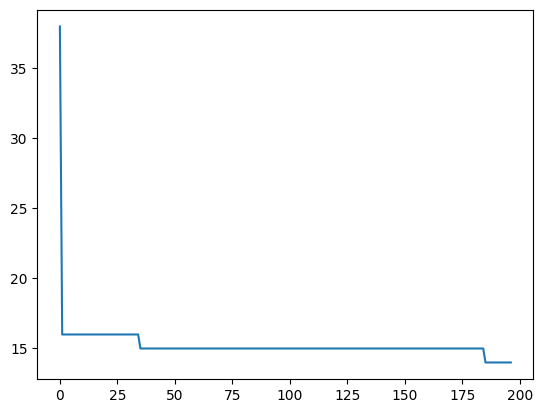

In [ ]:
import matplotlib.pyplot as plt
plt.plot(record_best_value_HC)

In [ ]:
best_history_hc.append(current_value)

In [ ]:
best_history_hc

[14.0]

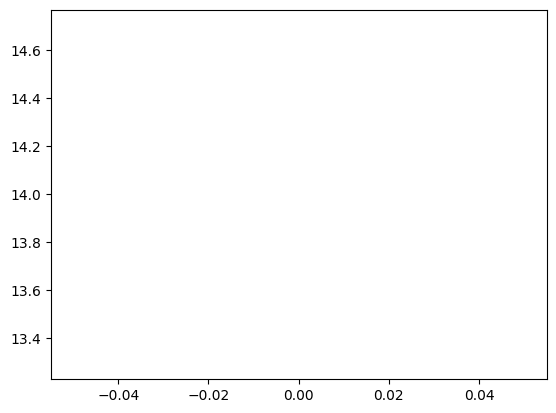

In [ ]:
plt.plot(best_history_hc)

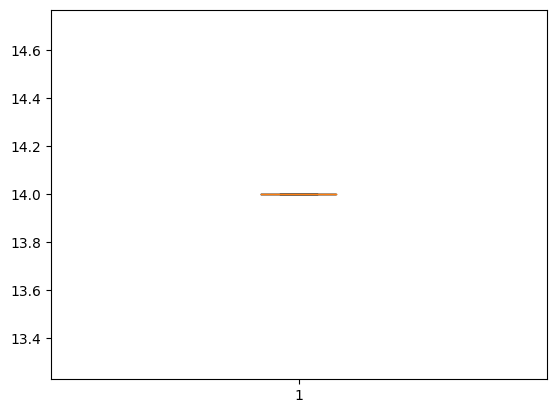

In [ ]:
# Great Deluge Boxplot
plt.boxplot(best_history_hc)
plt.show()

In [ ]:
print_the_solution(optimal_ts_room, optimal_ts_time, optimal_ts_ta, optimal_ts_stu)

,Room,Timeslot,TAs,Students
0,4,1,"[0, 6]","[5, 11, 39, 42, 43, 44, 45, 46, 47, 48, 49, 53..."
1,4,20,"[1, 2]","[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 14, 16, 17..."
2,5,20,"[3, 4]","[124, 125, 126, 127, 128, 130, 132, 134, 136, ..."
3,2,14,"[5, 11]","[37, 52, 72, 75, 79, 104, 105, 118, 123, 129, ..."
4,2,12,"[7, 8]","[21, 35, 41, 50, 57, 65, 70, 78, 157, 163, 164..."
5,0,19,"[9, 10]","[77, 177, 191, 202]"


In [ ]:
obj_function(optimal_ts_ta, optimal_ts_stu)

14.0

### Pembuktian Feasibility Solusi Hill Climbing

In [ ]:
print_the_solution(optimal_ts_room, optimal_ts_time, optimal_ts_ta, optimal_ts_stu)

,Room,Timeslot,TAs,Students
0,4,1,"[0, 6]","[5, 11, 39, 42, 43, 44, 45, 46, 47, 48, 49, 53..."
1,4,20,"[1, 2]","[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 14, 16, 17..."
2,5,20,"[3, 4]","[124, 125, 126, 127, 128, 130, 132, 134, 136, ..."
3,2,14,"[5, 11]","[37, 52, 72, 75, 79, 104, 105, 118, 123, 129, ..."
4,2,12,"[7, 8]","[21, 35, 41, 50, 57, 65, 70, 78, 157, 163, 164..."
5,0,19,"[9, 10]","[77, 177, 191, 202]"


**Pembuktian Hill Climbing**

[Feasibility 1 = Num of Student Match the Capacity](https://drive.google.com/file/d/10kFv7sHECCXtbWNU7YuZpCY3g6Nu4q4A/view?usp=drive_link)

[Feasibility 2 = Each student have ≤ 1 cohort](https://drive.google.com/file/d/17i5xZNPyD9XASZBDnchpmkJKV4vUblW4/view?usp=drive_link)

[Feasibility 3 = Each assigned student are in their attendable session](https://)

[Feasibility 4 = Each TA assigned to exactly 1 cohort](https://)

[link text](https://)

[link text](https://)

[link text](https://)

[link text](https://)

Feasibility 1 = Num of Student Match the Capacity

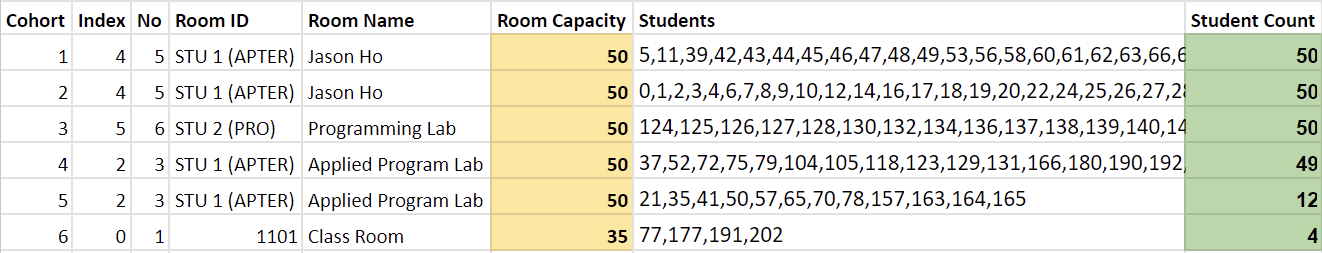

Feasibility 2 = Each student have ≤ 1 cohort

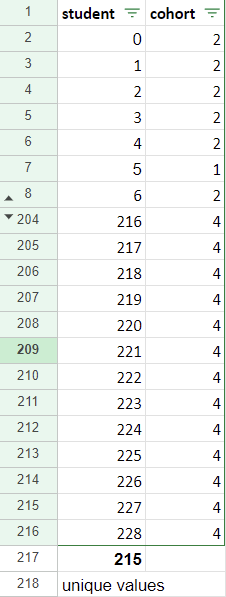

## **Algoritma Great Deluge**

In [ ]:
best_history_gd = []
timeslot_history_gd = []

In [ ]:
# Parameter Great Deluge
rainspeed = 1
totalitter = 200
water_up_thres = 10
backtrack_size = 4500
no_improvement = 0
waterup_chance = 1
backtrack_water = 0

x: 1, iteration: 0, water_level: 43.78, current_fitness: 38.0
x: 1, iteration: 1, water_level: 43.56, current_fitness: 31.0
x: 1, iteration: 2, water_level: 43.34, current_fitness: 39.0
x: 1, iteration: 3, water_level: 43.120000000000005, current_fitness: 20.0
x: 1, iteration: 4, water_level: 42.900000000000006, current_fitness: 37.0
x: 1, iteration: 5, water_level: 42.68000000000001, current_fitness: 38.0
x: 1, iteration: 6, water_level: 42.46000000000001, current_fitness: 34.0
x: 1, iteration: 7, water_level: 42.24000000000001, current_fitness: 38.0
x: 1, iteration: 8, water_level: 42.02000000000001, current_fitness: 38.0
x: 1, iteration: 9, water_level: 41.80000000000001, current_fitness: 37.0
x: 1, iteration: 10, water_level: 41.58000000000001, current_fitness: 41.0
x: 1, iteration: 11, water_level: 41.360000000000014, current_fitness: 20.0
x: 1, iteration: 12, water_level: 41.140000000000015, current_fitness: 23.0
x: 1, iteration: 13, water_level: 40.920000000000016, current_fitne

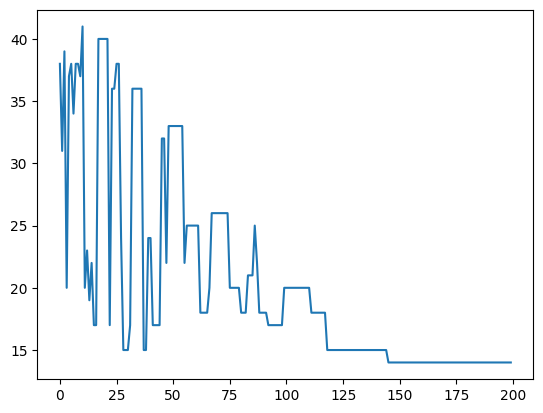

In [ ]:
# Modified Great Deluge Algorithm
initial_solution_GD_room = chosen_room
initial_solution_GD_time = ts_room
initial_solution_GD_ta = ts_ta
initial_solution_GD_stu = ts_stu

current_solution_GD_room = chosen_room
current_solution_GD_time = ts_room
current_solution_GD_ta = ts_ta
current_solution_GD_stu = ts_stu

current_fitness_GD = obj_function(current_solution_GD_ta, current_solution_GD_stu)

best_solution_GD_room = chosen_room
best_solution_GD_time = ts_room
best_solution_GD_ta = ts_ta
best_solution_GD_stu = ts_stu

best_fitness_GD = current_fitness_GD
abs_best_fitness_GD = best_fitness_GD

abs_best_solution_GD_room = best_solution_GD_room
abs_best_solution_GD_time = best_solution_GD_time
abs_best_solution_GD_ta = best_solution_GD_ta
abs_best_solution_GD_stu = best_solution_GD_stu

record_best_fitness_GD = []
record_water_level = []

water_level = current_fitness_GD
decay_rate = current_fitness_GD*(rainspeed/totalitter)

for i in range(totalitter):
  current_solution_GD_room, current_solution_GD_time, current_solution_GD_ta, current_solution_GD_stu = generate_new_solution(best_solution_GD_room, best_solution_GD_time, best_solution_GD_ta, best_solution_GD_stu)
  current_fitness_GD = obj_function(current_solution_GD_ta, current_solution_GD_stu)
  record_water_level.append(water_level)

  if current_fitness_GD < best_fitness_GD:
    best_solution_GD_room = current_solution_GD_room
    best_solution_GD_time = current_solution_GD_time
    best_solution_GD_ta = current_solution_GD_ta
    best_solution_GD_stu = current_solution_GD_stu
    best_fitness_GD = current_fitness_GD
    water_level = water_level-decay_rate
    no_improvement = 0
    backtrack_no_improve = False

    if abs_best_fitness_GD > best_fitness_GD:
      abs_best_solution_GD_room = best_solution_GD_room
      abs_best_solution_GD_time = best_solution_GD_time
      abs_best_solution_GD_ta = best_solution_GD_ta
      abs_best_solution_GD_stu = best_solution_GD_stu
      abs_best_fitness_GD = best_fitness_GD

  elif current_fitness_GD <= water_level:
    best_solution_GD_room = current_solution_GD_room
    best_solution_GD_time = current_solution_GD_time
    best_solution_GD_ta = current_solution_GD_ta
    best_solution_GD_stu = current_solution_GD_stu
    best_fitness_GD = current_fitness_GD
    water_level = water_level - decay_rate
    no_improvement = 0
    backtrack_no_improve = False

    if abs_best_fitness_GD > best_fitness_GD:
      abs_best_solution_GD_room = best_solution_GD_room
      abs_best_solution_GD_time = best_solution_GD_time
      abs_best_solution_GD_ta = best_solution_GD_ta
      abs_best_solution_GD_stu = best_solution_GD_stu
      abs_best_fitness_GD = best_fitness_GD

  elif current_fitness_GD == best_fitness_GD:
    current_solution_GD_room = best_solution_GD_room
    current_solution_GD_time = best_solution_GD_time
    current_solution_GD_ta = best_solution_GD_ta
    current_solution_GD_stu = best_solution_GD_stu
    current_fitness_GD = best_fitness_GD
    water_level = water_level - decay_rate

  else:
    current_solution_GD_room = best_solution_GD_room
    current_solution_GD_time = best_solution_GD_time
    current_solution_GD_ta = best_solution_GD_ta
    current_solution_GD_stu = best_solution_GD_stu
    current_fitness_GD = best_fitness_GD
    water_level = water_level - decay_rate
    no_improvement += 1

    if no_improvement == water_up_thres and waterup_chance > 0:
      if backtrack_no_improve == False:
        backtrack_water = i - backtrack_size
        if backtrack_water < 0:
          backtrack_water = 0
      elif backtrack_no_improve == True:
        backtrack_water = backtrack_water - backtrack_size
        if backtrack_water < 0:
          backtrack_water = 0

      water_level = record_water_level[backtrack_water-1]
      backtrack_no_improve = True
      if backtrack_water > 0:
        waterup_chance -= 1

  print('x: {}, iteration: {}, water_level: {}, current_fitness: {}'.format(waterup_chance, i, water_level, best_fitness_GD))
  record_best_fitness_GD.append(best_fitness_GD)

best_history_gd.append(abs_best_fitness_GD)
timeslot_history_gd.append(abs_best_solution_GD_room)

plt.plot(record_best_fitness_GD)
print('best_fitness: {}, best_solution: {}'.format(abs_best_fitness_GD, abs_best_solution_GD_room))

In [ ]:
best_history_gd

[14.0]

In [ ]:
timeslot_history_gd

[[2, 1, 3, 5, 4, 3]]

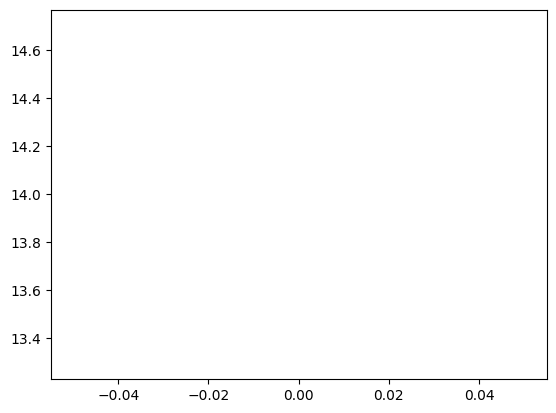

In [ ]:
plt.plot(best_history_gd)

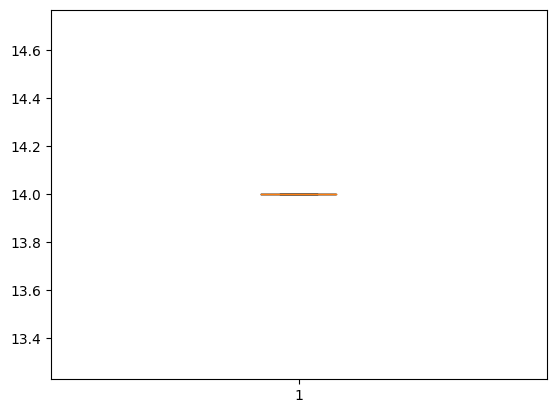

In [ ]:
# Great Deluge Boxplot
plt.boxplot(best_history_gd)
plt.show()

In [ ]:
min_gd, max_gd, average_gd,  = desc(best_history_gd)
print('GD minimum objective function: {},\nGD maximum objective function: {},\nGD objective function average: {}'.format(min_gd, max_gd, average_gd))

GD minimum objective function: 14.0,
GD maximum objective function: 14.0,
GD objective function average: 14.0


In [ ]:
print_the_solution(abs_best_solution_GD_room, abs_best_solution_GD_time, abs_best_solution_GD_ta, abs_best_solution_GD_stu)

,Room,Timeslot,TAs,Students
0,2,19,"[0, 1]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16,..."
1,1,1,"[6, 8]","[11, 39, 43, 44, 45, 46, 47, 48, 49, 56, 58, 6..."
2,3,12,"[3, 7]","[21, 32, 35, 37, 50, 51, 52, 54, 55, 57, 59, 6..."
3,5,4,"[2, 9]","[97, 101, 102, 104, 105, 107, 108, 109, 114, 1..."
4,4,14,"[4, 5]","[117, 118, 123, 160, 166, 207, 208, 209, 210, ..."
5,3,12,"[10, 11]","[163, 164, 165]"


In [ ]:
obj_function(abs_best_solution_GD_ta, abs_best_solution_GD_stu)

14.0

In [ ]:
# Melihat mahasiswa yang tidak terpetakan ke dalam cohort
impossible_student = [13, 23, 40, 64, 96, 133, 135, 167, 168, 169, 170, 195]
for i in np.arange(229):
  if i not in impossible_student:
    if not any(i in x for x in abs_best_solution_GD_stu):
      print(i)

15
171


### **Pembuktian Feasibility Solusi Great Deluge**

In [ ]:
print_the_solution(optimal_ts_room, optimal_ts_time, optimal_ts_ta, optimal_ts_stu)

,Room,Timeslot,TAs,Students
0,4,1,"[0, 6]","[5, 11, 39, 42, 43, 44, 45, 46, 47, 48, 49, 53..."
1,4,20,"[1, 2]","[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 14, 16, 17..."
2,5,20,"[3, 4]","[124, 125, 126, 127, 128, 130, 132, 134, 136, ..."
3,2,14,"[5, 11]","[37, 52, 72, 75, 79, 104, 105, 118, 123, 129, ..."
4,2,12,"[7, 8]","[21, 35, 41, 50, 57, 65, 70, 78, 157, 163, 164..."
5,0,19,"[9, 10]","[77, 177, 191, 202]"


**Pembuktian Hill Climbing**

[Feasibility 1 = Num of Student Match the Capacity](https://drive.google.com/file/d/1VTgu8f7BuQc-pxTUX-ocQIluMlrFW6aD/view?usp=drive_link)

[Feasibility 2 = Each student have ≤ 1 cohort](https://drive.google.com/file/d/1Da7wFjCLah7EaER-f8SLWEHeM4KBjzWV/view?usp=drive_link)

[Feasibility 3 = Each assigned student are in their attendable session](https://)